Victor H Esparza Díaz
195282

In [1]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession

# Tarea PySpark

### Objetivo:
 Analizar la eficiencia de los jugadores en términos generales y por posición, así como determinar la contribución al equipo por jugador tomando en cuenta los datos obtenidos

Usarás la base de datos del archivo 'fusbol.csv' para obtener tus datos. Checa la estructura del archivo para ver si es necesario limpiar la informacion, ver su estructura y así sea más fácil completar la tarea. Besos.

### Ejercicio 1:
Carga la base de datos en un DataFrame de Pyspark (con 2 nucleos). Valida los rangos de los valores donde sea aplicable, así como su corrección (en caso de ser necesaria). 
Después, utilizando las variables más relevantes como 'Ast/90', 'PassCmp%', etc., concluye qué ligas tienen los mejores jugadores por posición. Es decir, si los mejores jugadores defensas son de la liga francesa, inglesa, etc., por ejemplo.
Como cada persona tiene una definición de "mejor", utiliza las siguientes metricas por posición:
- Delanteros: npG+A/90 y npxG+xA/90
- Medios: KeyPass/90 y PassCmp%
- Defensas: PressSucc% y Interceptions/90

Con los resultados obtenidos, grafica por posición para que tu conclusión tenga un respaldo visual también.

In [5]:
spark = SparkSession.builder.appName('firstSession')\
    .config('spark.master', 'local[2]')\
    .config('spark.executor.memory', '1g')\
    .config("spark.sql.shuffle.partitions", 10)\
    .config('spark.driver.memory','1g')\
    .getOrCreate()

In [6]:
spark

In [20]:
df=spark.read.csv('fusbol.csv', header=True, inferSchema=True)

In [21]:
df.columns

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Ast/90',
 'npG/90',
 'npG+A/90',
 'xA/90',
 'npxG/90',
 'npxG+xA/90',
 'Shots/90',
 'SoTs/90',
 'SoT%',
 'Gls/Shot',
 'Gls/SoT',
 'AvgShotDist',
 'FKSht/90',
 'npxG/Shot',
 'np:G-xG',
 'PassCmp/90',
 'PassAtt/90',
 'PassCmp%',
 'TotDistPass/90',
 'PrgDistPass/90',
 'ShortCmp/90',
 'ShortAtt/90',
 'ShortCmp%',
 'MedCmp/90',
 'MedAtt/90',
 'MedCmp%',
 'LongCmp/90',
 'LongAtt/90',
 'LongCmp%',
 'KeyPass/90',
 'PassIntoThird/90',
 'PassIntoBox/90',
 'CrossIntoBox/90',
 'ProgPass/90',
 'LivePassAtt/90',
 'DeadPassAtt/90',
 'FKPassAtt/90',
 'TBCmp/90',
 'PassUnderPress/90',
 'Switches/90',
 'Crosses/90',
 'GroundPass/90',
 'LowPass/90',
 'HighPass/90',
 'LeftPass/90',
 'RightPass/90',
 'HeadPass/90',
 'ThrowPass/90',
 'OtherPartPass/90',
 'OffsidePass/90',
 'OutOBPass/90',
 'PassesInt/90',
 'PassesBlk/90',
 'SCA/90',
 'PassLiveSCA/90',
 'PassDeadSCA/90',
 'DribSCA/90',
 'ShSCA/90',
 'FoulSCA

In [22]:
df=df.dropna()

In [23]:
df.printSchema()

root
 |-- Player: string (nullable = true)
 |-- Nation: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Squad: string (nullable = true)
 |-- Comp: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Born: double (nullable = true)
 |-- MP: integer (nullable = true)
 |-- Starts: integer (nullable = true)
 |-- Min: integer (nullable = true)
 |-- 90s: double (nullable = true)
 |-- Ast/90: double (nullable = true)
 |-- npG/90: double (nullable = true)
 |-- npG+A/90: double (nullable = true)
 |-- xA/90: double (nullable = true)
 |-- npxG/90: double (nullable = true)
 |-- npxG+xA/90: double (nullable = true)
 |-- Shots/90: double (nullable = true)
 |-- SoTs/90: double (nullable = true)
 |-- SoT%: double (nullable = true)
 |-- Gls/Shot: double (nullable = true)
 |-- Gls/SoT: double (nullable = true)
 |-- AvgShotDist: double (nullable = true)
 |-- FKSht/90: double (nullable = true)
 |-- npxG/Shot: double (nullable = true)
 |-- np:G-xG: double (nullable = true)
 |--

In [25]:
posiciones=df.groupBy('Pos').count()
posiciones.show()

+-----+-----+
|  Pos|count|
+-----+-----+
|DF,MF|   55|
|FW,DF|   16|
|MF,DF|   47|
|   GK|    2|
|   MF|  399|
|   DF|  582|
|DF,FW|   18|
|   FW|  282|
|FW,MF|  244|
|MF,FW|  194|
+-----+-----+



Primero voy a separar las posiciones para poder trabajar con los jugadores que tienen 2 posiciones

In [56]:
from pyspark.sql.functions import split, col
df_split=df.withColumn("Pos 2", split(col("Pos"), ","))
df_split2=df_split.withColumn("Posicion 1", col("Pos 2")[0])\
                    .withColumn("Posicion 2", col("Pos 2")[1])
df_split2= df_split2.drop("Pos 2")


df2=df_split2
df2.columns

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Ast/90',
 'npG/90',
 'npG+A/90',
 'xA/90',
 'npxG/90',
 'npxG+xA/90',
 'Shots/90',
 'SoTs/90',
 'SoT%',
 'Gls/Shot',
 'Gls/SoT',
 'AvgShotDist',
 'FKSht/90',
 'npxG/Shot',
 'np:G-xG',
 'PassCmp/90',
 'PassAtt/90',
 'PassCmp%',
 'TotDistPass/90',
 'PrgDistPass/90',
 'ShortCmp/90',
 'ShortAtt/90',
 'ShortCmp%',
 'MedCmp/90',
 'MedAtt/90',
 'MedCmp%',
 'LongCmp/90',
 'LongAtt/90',
 'LongCmp%',
 'KeyPass/90',
 'PassIntoThird/90',
 'PassIntoBox/90',
 'CrossIntoBox/90',
 'ProgPass/90',
 'LivePassAtt/90',
 'DeadPassAtt/90',
 'FKPassAtt/90',
 'TBCmp/90',
 'PassUnderPress/90',
 'Switches/90',
 'Crosses/90',
 'GroundPass/90',
 'LowPass/90',
 'HighPass/90',
 'LeftPass/90',
 'RightPass/90',
 'HeadPass/90',
 'ThrowPass/90',
 'OtherPartPass/90',
 'OffsidePass/90',
 'OutOBPass/90',
 'PassesInt/90',
 'PassesBlk/90',
 'SCA/90',
 'PassLiveSCA/90',
 'PassDeadSCA/90',
 'DribSCA/90',
 'ShSCA/90',
 'FoulSCA

In [50]:
posiciones1=df2.groupBy('Posicion 1').count()
posiciones1.show()

+----------+-----+
|Posicion 1|count|
+----------+-----+
|        GK|    2|
|        MF|  640|
|        DF|  655|
|        FW|  542|
+----------+-----+



In [51]:
posiciones2=df2.groupBy('Posicion 2').count()
posiciones2.show()

+----------+-----+
|Posicion 2|count|
+----------+-----+
|      NULL| 1265|
|        MF|  299|
|        FW|  212|
|        DF|   63|
+----------+-----+



Para el análisis, solo consideraré a los jugadores por su posición primaria, de esta forma creo que se evita que se repitan en múltiples posiciones

Empezando con los defensas, para poder hacer una métrica donde todo esté bajo la misma "medida", voy a usar solo estadísticas que tengan el "/90", pues esto considera la misma cantidad de minutos jugados para todos los jugadores

Crearé una métrica en la que sumaré: 
TklW/90
Blocks/90
Interceptions/90
Clearances/90
Y le restaré: FoulSCA/90

In [93]:
from pyspark.sql.functions import expr
df_def=df2.filter(col("Posicion 1")=="DF")

from pyspark.sql.functions import expr
df_def2 = df_def.withColumn("Métrica DF", col("TklW/90") + col("Blocks/90") + col("Interceptions/90") + col("Clearances/90") - col("FoulSCA/90"))

df_def3=df_def2.groupby("Comp").avg("Métrica DF").orderBy("avg(Métrica DF)", ascending=False)
df_def3.show()

+------------------+-----------------+
|              Comp|  avg(Métrica DF)|
+------------------+-----------------+
|        fr Ligue 1|      8.273828125|
|eng Premier League|8.238515625000002|
|     de Bundesliga|       8.19578125|
|        es La Liga|7.759841269841268|
|        it Serie A|7.441999999999999|
+------------------+-----------------+



Concluimos que los mejores Defensas son de la Ligue 1

Haremos algo similar para el resto de posiciones

In [92]:
df_med=df2.filter(col("Posicion 1")=="MF")

df_med2 = df_med.withColumn("Métrica MF", col("npG+A/90") + col("SuccDrib/90") + col("KeyPass/90") + col("Interceptions/90") - col("Dispossessed/90"))

df_med3=df_med2.groupby("Comp").avg("Métrica MF").orderBy("avg(Métrica MF)", ascending=False)
df_med3.show()

+------------------+------------------+
|              Comp|   avg(Métrica MF)|
+------------------+------------------+
|        it Serie A|2.2205263157894737|
|     de Bundesliga|2.1953465346534653|
|eng Premier League|2.1950406504065034|
|        fr Ligue 1|2.0900000000000003|
|        es La Liga|2.0490972222222226|
+------------------+------------------+



Nuevamente, los medios son mejores en la Serie A

In [96]:
df_del=df2.filter(col("Posicion 1")=="FW")

df_del2 = df_del.withColumn("Métrica FW", col("npxG+xA/90") + col("SuccDrib/90") + col("SoTs/90") + col("Att 3rdTkl/90") - col("Dispossessed/90"))

df_del3=df_del2.groupby("Comp").avg("Métrica FW").orderBy("avg(Métrica FW)", ascending=False)
df_del3.show()
df_del3.columns

+------------------+------------------+
|              Comp|   avg(Métrica FW)|
+------------------+------------------+
|        it Serie A|1.1875229357798165|
|     de Bundesliga|1.1374766355140185|
|eng Premier League|1.0780769230769223|
|        fr Ligue 1|0.9383185840707968|
|        es La Liga|0.9249541284403666|
+------------------+------------------+



['Comp', 'avg(Métrica FW)']

Y curiosamente, nuevamente son los delanteros de la SerieA los que mejores métricas tienen

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

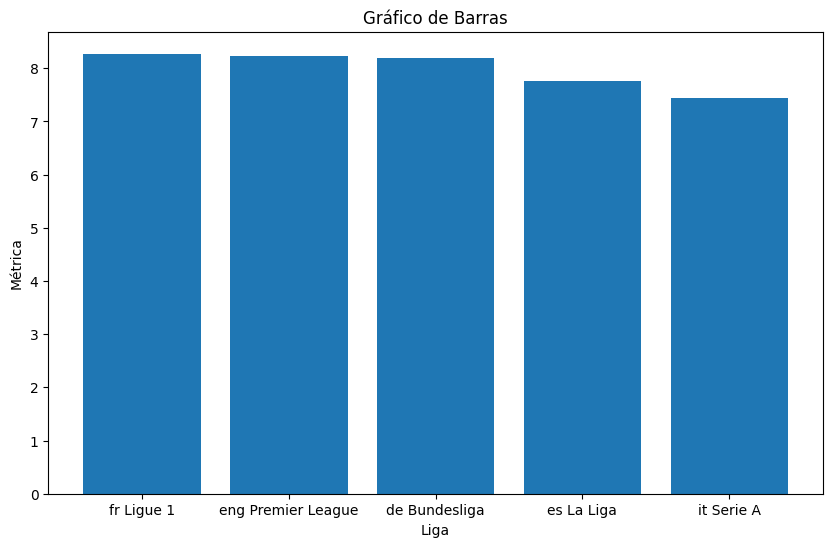

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

df_defp = df_def3.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(df_defp['Comp'], df_defp['avg(Métrica DF)'])
plt.xlabel('Liga')
plt.ylabel('Métrica')
plt.title('Gráfico de Barras')
plt.show()

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

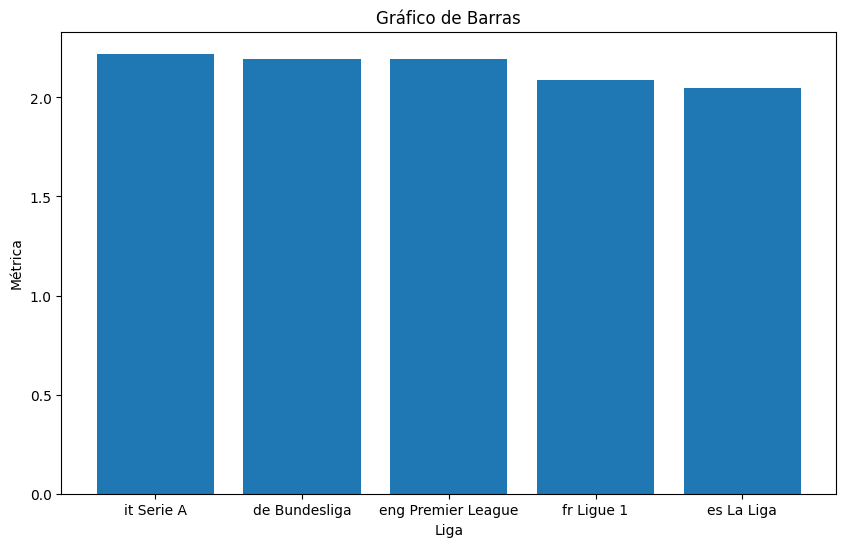

In [100]:
df_medp = df_med3.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(df_medp['Comp'], df_medp['avg(Métrica MF)'])
plt.xlabel('Liga')
plt.ylabel('Métrica')
plt.title('Gráfico de Barras')
plt.show()

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

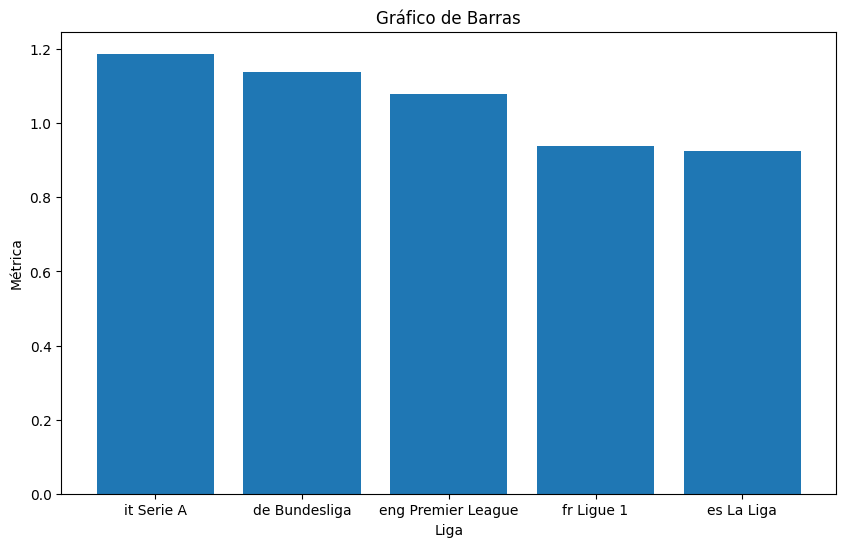

In [101]:
df_delp = df_del3.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(df_delp['Comp'], df_delp['avg(Métrica FW)'])
plt.xlabel('Liga')
plt.ylabel('Métrica')
plt.title('Gráfico de Barras')
plt.show()

### Ejercicio 2:

Ahora hagamos algo un poco más interesante. Escoge algún jugador de todos los disponibles y toma 5 metricas, las que quieras. Debes concluir en qué percentil se encuentra el jugador en esas métricas que escogiste. Obviamente, vas a comparar sus valores con todos los demás con los que comparte posición y liga, para no tener un sesgo y que la información no pierda robustez. Por último, genera un DataFrame de Pyspark con todos los datos solicitados. Muestra el DataFrame y conviertelo a otro de tipo pandas. Muestra los dos.

In [119]:
df_ej2 = df2.filter((col("Posicion 1") == "MF") & (col("Comp") == "it Serie A"))
jugador=df_ej2.filter(col("Player")=="Nicolò Barella").select("npG+A/90", "SuccDrib/90", "KeyPass/90", "Interceptions/90", "Dispossessed/90")
comparacion=df_ej2.select("npG+A/90", "SuccDrib/90", "KeyPass/90", "Interceptions/90", "Dispossessed/90")

comparacion.describe().show()

+-------+-------------------+------------------+------------------+------------------+------------------+
|summary|           npG+A/90|       SuccDrib/90|        KeyPass/90|  Interceptions/90|   Dispossessed/90|
+-------+-------------------+------------------+------------------+------------------+------------------+
|  count|                133|               133|               133|               133|               133|
|   mean|0.21067669172932332|  1.05624060150376|              1.15|1.0625563909774434|1.2589473684210528|
| stddev| 0.1967662645417138|0.6006216495555144|0.7038594901101937|0.5181722746979657|0.6269131484454441|
|    min|                0.0|               0.0|               0.0|               0.0|               0.0|
|    max|               1.32|              3.15|               4.0|               3.4|              2.99|
+-------+-------------------+------------------+------------------+------------------+------------------+



In [138]:
jugador_metrica=jugador.collect()[0]
comparacion_metrica=comparacion.collect()
nombre="Nicolò Barella"
metricas_selec=["npG+A/90", "SuccDrib/90", "KeyPass/90", "Interceptions/90", "Dispossessed/90"]

percentiles = []
for metricas in ["npG+A/90", "SuccDrib/90", "KeyPass/90", "Interceptions/90", "Dispossessed/90"]:
    metrica_jugador = getattr(jugador_metrica, metricas)
    metrica_otros = [getattr(jugador, metricas) for jugador in comparacion_metrica]
    percentile = sum(1 for value in metrica_otros if value <= metrica_jugador) / len(metrica_otros) * 100
    percentiles.append(percentile)

percentiles

[72.93233082706767,
 65.41353383458647,
 75.93984962406014,
 47.368421052631575,
 56.390977443609025]

In [140]:
columnas = ["Métrica", "Percentil"]
filas=[]
for metrica, percentile in zip(metricas_selec, percentiles):
    filas.append((metrica, percentile))
filas

[('npG+A/90', 72.93233082706767),
 ('SuccDrib/90', 65.41353383458647),
 ('KeyPass/90', 75.93984962406014),
 ('Interceptions/90', 47.368421052631575),
 ('Dispossessed/90', 56.390977443609025)]

In [142]:
df_l = spark.createDataFrame(filas, schema=columnas)
df_l.show()

+----------------+------------------+
|         Métrica|         Percentil|
+----------------+------------------+
|        npG+A/90| 72.93233082706767|
|     SuccDrib/90| 65.41353383458647|
|      KeyPass/90| 75.93984962406014|
|Interceptions/90|47.368421052631575|
| Dispossessed/90|56.390977443609025|
+----------------+------------------+



In [145]:
df_pandas = df_l.toPandas()
df_pandas.head()

,Métrica,Percentil
0,npG+A/90,72.932331
1,SuccDrib/90,65.413534
2,KeyPass/90,75.939850
3,Interceptions/90,47.368421
4,Dispossessed/90,56.390977
